# JUST SOME NOTES FOR MYSELF
## Model Evaluate 
* t-SNE plot with clusters 
* Cluster Cardinality
* Cluster Magnitide
* Cardinality vs Magntiude plot 
    - Clusters with a higher cardinality tend to also have a higher cluster magnitude. The idea is that normal clusters lie on or are very close to the 45-degree line. [Reference](https://towardsdatascience.com/common-mistakes-in-cluster-analysis-and-how-to-avoid-them-eb960116d773)

## Find outimal k-value
* t-SNE plot at optimal perplexity (just see number of clusters eye power)
* Knee plot
* shilotee score

## Model Interpretation
* display the cluster characteristics with a radar
* calculate the mean values of each feature table format
    * Expand to chart 

# Project initialization
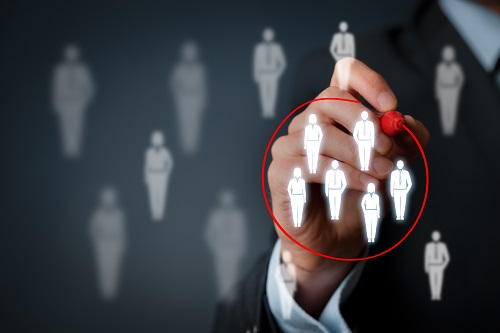
## Background

As a HR manager, you want to understand your employees so that appropriate 
direction can be given to the management to satisfy and retain the employees.

The main goal is to Cluster the different types of Employees based on attributes like their age, job scope,salary etc and answer the following questions. 

* What are the characteristics of each employee cluster
  * Due to these characteristics, what are the main needs of each cluster

*   Which group of employee is the most vulnerable that the management should do 
something to retain them.

*   List item

## Keywords
- Unsupervised Learning
- K-Means Clustering
- Silhouette Analysis
- Hierarchical Clustering
- DBSCAN
- t-SNE
- Clusters Interpretation

## Import libraries

In [1]:
from typing import Sequence, Tuple
from itertools import combinations, chain
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import sklearn
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering,DBSCAN, OPTICS
from scipy.cluster.hierarchy import dendrogram
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
import warnings # Statsmodels likes to throw out warnings. Some of them are important, some are not

# Graphing
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objs as go
from plotly import tools

## EDA
import phik
from phik import resources, report


## Import Dataset

In [2]:
df_raw = pd.read_csv('../Data/Company_Employee.csv')
df_raw

,Age,Gender,BusinessTravel,Job Function,Distance Between Company and Home (KM),"Education (1 is lowest, 5 is highest)","Job Satisfaction (1 is lowest, 4 is highest)",MaritalStatus,Salary ($),"Performance Rating (1 is lowest, 4 is highest)","Work Life Balance (1 is worst, 4 is best)",Length of Service (Years),Resign Status
0,41,Female,Travel_Rarely,Sales,1,2,4,Single,5993,3,1,6,Yes
1,49,Male,Travel_Frequently,Research & Development,8,1,2,Married,5130,4,3,10,No
2,37,Male,Travel_Rarely,Research & Development,2,2,3,Single,2090,3,3,0,Yes
3,33,Female,Travel_Frequently,Research & Development,3,4,3,Married,2909,3,3,8,No
4,27,Male,Travel_Rarely,Research & Development,2,1,2,Married,3468,3,3,2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Male,Travel_Frequently,Research & Development,23,2,4,Married,2571,3,3,5,No
1466,39,Male,Travel_Rarely,Research & Development,6,1,1,Married,9991,3,3,7,No
1467,27,Male,Travel_Rarely,Research & Development,4,3,2,Married,6142,4,3,6,No
1468,49,Male,Travel_Frequently,Sales,2,3,2,Married,5390,3,2,9,No


### <h2>Metadata</h2>

| Attribute | Description | Type |
|---|---|---|
| Age | Employee age | Discrete |
| Gender | Employee gender | Categorical-Nominal |
| BusinessTravel:  | Customer's age | Numerical-Continuous |
| Job Function: | Customer's annual income denominated in thousands | Numerical-Continuous |
| Distance Between Company and Home (KM): | spending score between 1 to 100 | Numerical-Continuous |
| Age | Employee age | Discrete |
| Age | Employee age | Discrete |
| Age | Employee age | Discrete |
| Age | Employee age | Discrete |
| Age | Employee age | Discrete |

<link href='styles.css' rel='stylesheet'>
<!--bootstrap-->
<link href="https://cdn.jsdelivr.net/npm/bootstrap@5.0.2/dist/css/bootstrap.min.css" rel="stylesheet" integrity="sha384-EVSTQN3/azprG1Anm3QDgpJLIm9Nao0Yz1ztcQTwFspd3yD65VohhpuuCOmLASjC" crossorigin="anonymous">

## Feature Renaming 

The current feature names are extremely descriptive, for simplicity I'll be shorterning the feature names for easier understanding

In [3]:
# Remove Explanation in features
df_raw.rename(columns = {
    "Distance Between Company and Home (KM)" : "Distance",
    "Education (1 is lowest, 5 is highest)" : "Education",
    "Job Satisfaction (1 is lowest, 4 is highest)" : "Job_Satisfaction",
    "Salary ($)" : "Salary",
    "Performance Rating (1 is lowest, 4 is highest)" : "Performance_Rating",
    "Work Life Balance (1 is worst, 4 is best)" : "Work_Life_Balance",
    "Length of Service (Years)" : "Service_Years"
}, inplace = True)

In [4]:
df_raw.Gender = df_raw.Gender.astype('category') # Turns Gender to category dtype

df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 1470 non-null   int64   
 1   Gender              1470 non-null   category
 2   BusinessTravel      1470 non-null   object  
 3   Job Function        1470 non-null   object  
 4   Distance            1470 non-null   int64   
 5   Education           1470 non-null   int64   
 6   Job_Satisfaction    1470 non-null   int64   
 7   MaritalStatus       1470 non-null   object  
 8   Salary              1470 non-null   int64   
 9   Performance_Rating  1470 non-null   int64   
 10  Work_Life_Balance   1470 non-null   int64   
 11  Service_Years       1470 non-null   int64   
 12  Resign Status       1470 non-null   object  
dtypes: category(1), int64(8), object(4)
memory usage: 139.5+ KB


# EDA

A good data science project starts from understanding our data. With that, I aim to explore deeper on the following aspects: 

* How many observations are there in the data?
* Are there any errors or missing values in the data?
*  Univariative Analysis
*  Correlation between Features
*  Cardinality of Features


will perform some basic visualisation to spot some trends between features and target variable `Price ($)` and errors in the PC dataset.

---

To prevent the mutation of our original data, we will make a copy of our data to perform eda on it.



In [139]:
df_eda = df_raw.copy()

## How many observations in dataset

In [8]:
rows, cols = df_eda.shape
print("There are {} rows and {} features in the data.".format(rows, cols))

There are 1470 rows and 13 features in the data.


## Descriptive Statstics

In [9]:
df_eda.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.0,60.0
Distance,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0
Education,1470.0,2.912925,1.024165,1.0,2.0,3.0,4.0,5.0
Job_Satisfaction,1470.0,2.728571,1.102846,1.0,2.0,3.0,4.0,4.0
Salary,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.0,19999.0
Performance_Rating,1470.0,3.153741,0.360824,3.0,3.0,3.0,3.0,4.0
Work_Life_Balance,1470.0,2.761224,0.706476,1.0,2.0,3.0,3.0,4.0
Service_Years,1470.0,7.008163,6.126525,0.0,3.0,5.0,9.0,40.0


Observations:
* The means varies across features. For example:
    1. Salary mean of 6500
    2. Age mean of 36
* Standard Deviation varies across features.For example:
    1. Salary Std 4.7k
    2. Age std 9

Conclusion:
Might consider standardizing features in data preprocessing

## Cardinality of Categorical Features

In [141]:
# Extract cardinality of categorical variables 
df_eda.select_dtypes(include=['category','object']).describe().T

,count,unique,top,freq
Gender,1470,2,Male,882
BusinessTravel,1470,3,Travel_Rarely,1043
Job Function,1470,3,Research & Development,961
MaritalStatus,1470,3,Married,673
Resign Status,1470,2,No,1233


Observation:

All categorical features have low cardinality

Conclusion:
* Able to one-hot-encode without worrying about increasing dimensionality significantly 
* All features can be easily interpretable for analysis

## Univariative Analysis: distribution of all numeric features

Since we are working are going to work with k-means algorithm, that uses elducian distance, we have to check all if features follow what kind of distribution to perform approitate normalization in the Data preprocessing sections

In [10]:
df_eda_num = df_eda.select_dtypes(include=['int64', 'float64'])

numeric_features = df_eda_num.columns
# Extract out number of features
print("Number of Quantitative features: {}".format(len(numeric_features)))

Number of Quantitative features: 8


In [11]:
from plotly.subplots import make_subplots

import plotly.figure_factory as ff
import plotly.express as px
import plotly.graph_objects as go


# Plot distribution of each numerical feature
#Extract all numeric features
df_eda_num = df_eda.select_dtypes(include=['int64', 'float64'])

numeric_features = df_eda_num.columns
print(len(numeric_features))
fig = make_subplots(rows=len(numeric_features), cols=1)
for idx,feature in enumerate(numeric_features):
    fig.append_trace(go.Histogram(x=df_eda_num[feature], name=feature), row=idx+1, col=1)
    # add suptitle
    fig.update_xaxes(title_text=feature, row=idx+1, col=1)
    # Increase height of subplot

fig.update_layout(height=1200, width=800, title_text='Distribution of Numerical Features')
fig.show()



8


Observations:

* Age follows a Gaussian distribution
* Distance, Salary and Service Years is positively skewed
* Education, Job_Satisfcation ,Performance_Rating,Work_life_balance seems to 
* Performance_rating two unique values

Conclusion:

* Log transform and scale to [0,1] for Distance Salary and Service Years
* Normalize and scale to [0-1] for Age

Basically say which one gasuaiian (normal) distribution that can just normalize normally, if like skweewd must other method already 


Check whether size follows a power-law, Poisson, or Gaussian distribution.

* Power-law: Log transform and scale to [0,1].
* Poisson: Create quantiles and scale to [0,1].
* Gaussian: Normalize and scale to [0,1].

GO COMPLETE AH OI

## Pairplot

* Is there an identifiable cluster by glancing through the datapoints?
* Is there a significant difference of the Spending Behaviour across different gender?
* Is there a need to remove/create certain features to reduce ambiguity for the clustering?

In [12]:
sns.pairplot(df_eda, hue = 'Gender', palette=['b', 'r'], plot_kws=dict(alpha=0.4))
plt.show()

KeyboardInterrupt: 

## Bi-variate Analysis -Phik correlation 𝜙k

We will be using Phik correlation (𝜙k)  is the latest relatively new correlation metric that is based on several refinements to Pearson’s χ2 (chi-squared) contingency test

* What are the features highly correlated to Resign Status?
* Are there any two features that are very highly correlated to each other?

In [ ]:
df_eda.phik_matrix()

interval columns not set, guessing: ['Age', 'Distance', 'Education', 'Job_Satisfaction', 'Salary', 'Performance_Rating', 'Work_Life_Balance', 'Service_Years']


,Age,Gender,BusinessTravel,Job Function,Distance,Education,Job_Satisfaction,MaritalStatus,Salary,Performance_Rating,Work_Life_Balance,Service_Years,Resign Status
Age,1.000000,0.000000,0.069800,0.000000,0.000000,0.352040,0.000000,0.231465,0.542212,0.000000,0.055496,0.560431,0.278172
Gender,0.000000,1.000000,0.022402,0.015435,0.034159,0.000000,0.000000,0.019555,0.059711,0.000000,0.000000,0.051930,0.014016
BusinessTravel,0.069800,0.022402,1.000000,0.000000,0.042961,0.000000,0.000000,0.115345,0.043209,0.000000,0.000000,0.000000,0.074137
Job Function,0.000000,0.015435,0.000000,1.000000,0.000000,0.000000,0.031204,0.100830,0.299377,0.000000,0.050038,0.056353,0.046641
Distance,0.000000,0.034159,0.042961,0.000000,1.000000,0.000000,0.000000,0.000000,0.108462,0.072127,0.000000,0.000000,0.089419
Education,0.352040,0.000000,0.000000,0.000000,0.000000,1.000000,0.018766,0.000000,0.221059,0.000000,0.000000,0.174985,0.000000
Job_Satisfaction,0.000000,0.000000,0.000000,0.031204,0.000000,0.018766,1.000000,0.000000,0.000000,0.039723,0.000000,0.000000,0.150024
MaritalStatus,0.231465,0.019555,0.115345,0.100830,0.000000,0.000000,0.000000,1.000000,0.101592,0.000000,0.000000,0.095044,0.104779
Salary,0.542212,0.059711,0.043209,0.299377,0.108462,0.221059,0.000000,0.101592,1.000000,0.000000,0.000000,0.610329,0.280586
Performance_Rating,0.000000,0.000000,0.000000,0.000000,0.072127,0.000000,0.039723,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000


interval columns not set, guessing: ['Age', 'Distance', 'Education', 'Job_Satisfaction', 'Salary', 'Performance_Rating', 'Work_Life_Balance', 'Service_Years']


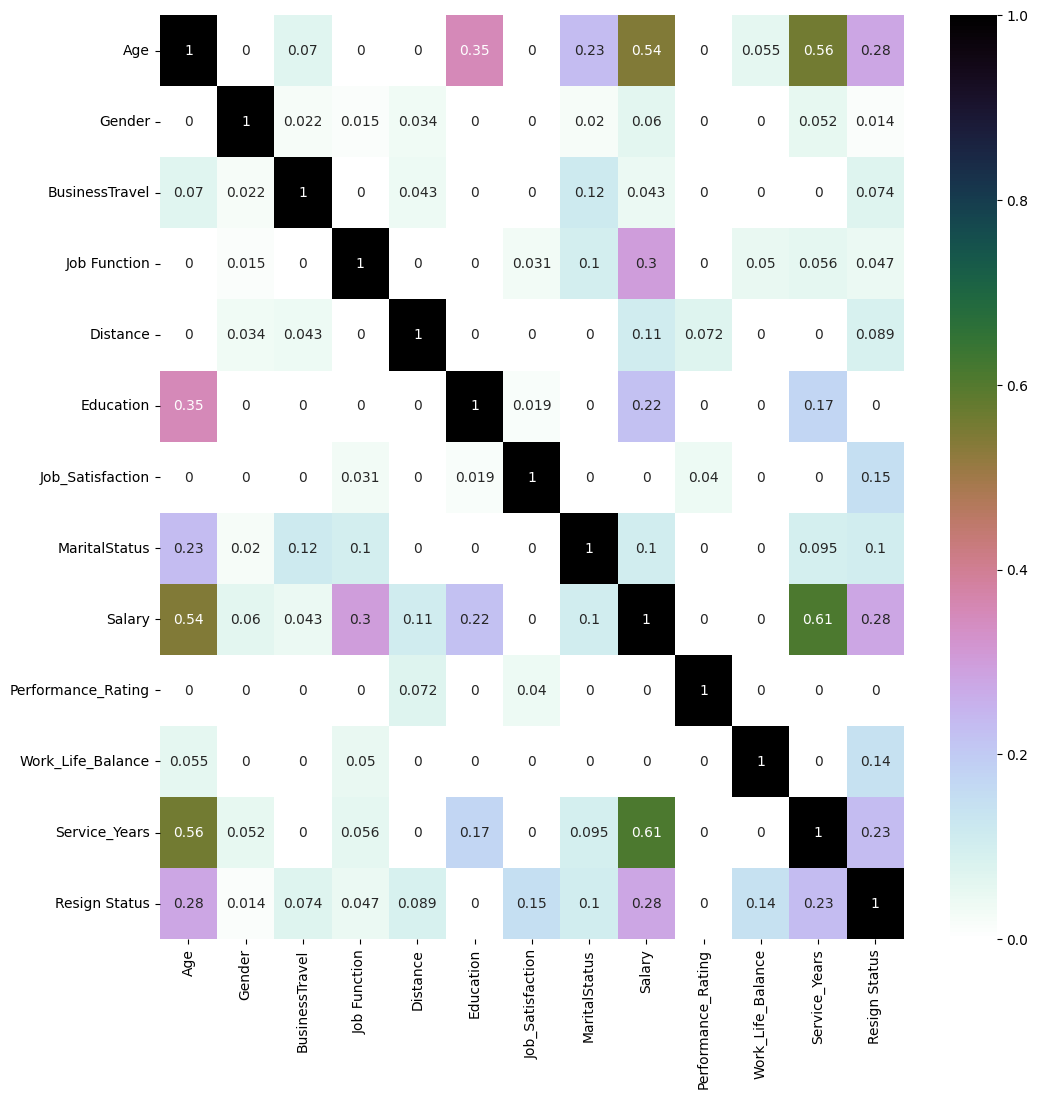

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(
    df_eda.phik_matrix(),
    cmap="cubehelix_r",
    annot = True)
plt.show()

Observations:
* `Gender`, `BusinessTrabel`, `Job Function`, `Distance`, `Education` and `Performace Rating` has extremely low correlation to Resign Status
* `Service Years` is highly correlated to `Age` and `Salary` which logically makes sence

Conclusion:
1. Attempt to drop features that has low correlation to Resign Status
2. Keep Salary,Service years and Resign Status for now

## Since we are only interested figuring out which clusters of emplyoees 
Focusing of Resign Status, the least correlated features to Resign Status are `Gender`,`Job Function`,`Disatance`, `Education`

## Univaritive Analysis across Resign Status 

In [ ]:
df_eda.head()

,Age,Gender,BusinessTravel,Job Function,Distance,Education,Job_Satisfaction,MaritalStatus,Salary,Performance_Rating,Work_Life_Balance,Service_Years,Resign Status
0,41,Female,Travel_Rarely,Sales,1,2,4,Single,5993,3,1,6,Yes
1,49,Male,Travel_Frequently,Research & Development,8,1,2,Married,5130,4,3,10,No
2,37,Male,Travel_Rarely,Research & Development,2,2,3,Single,2090,3,3,0,Yes
3,33,Female,Travel_Frequently,Research & Development,3,4,3,Married,2909,3,3,8,No
4,27,Male,Travel_Rarely,Research & Development,2,1,2,Married,3468,3,3,2,No


In [ ]:
df_eda.columns

Index(['Age', 'Gender', 'BusinessTravel', 'Job Function', 'Distance',
       'Education', 'Job_Satisfaction', 'MaritalStatus', 'Salary',
       'Performance_Rating', 'Work_Life_Balance', 'Service_Years',
       'Resign Status'],
      dtype='object')

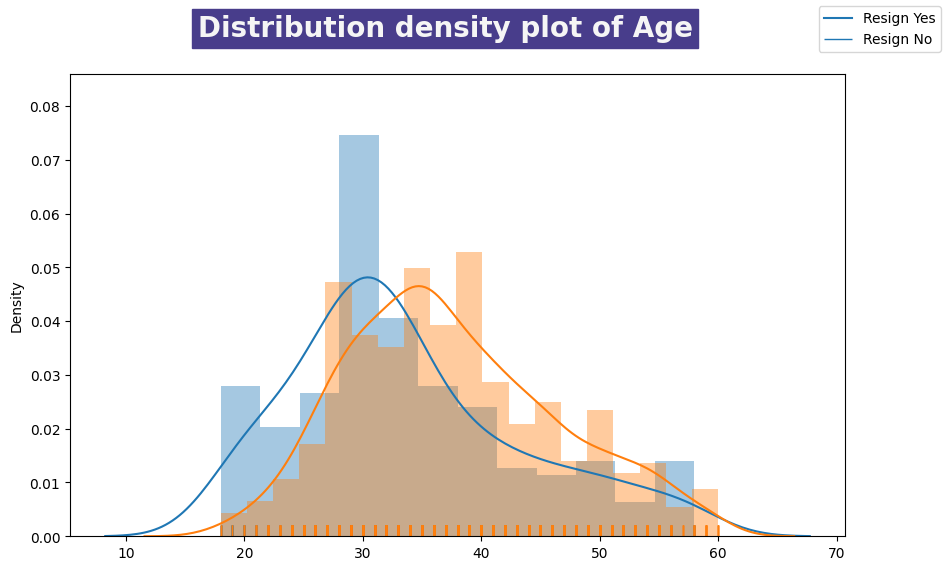

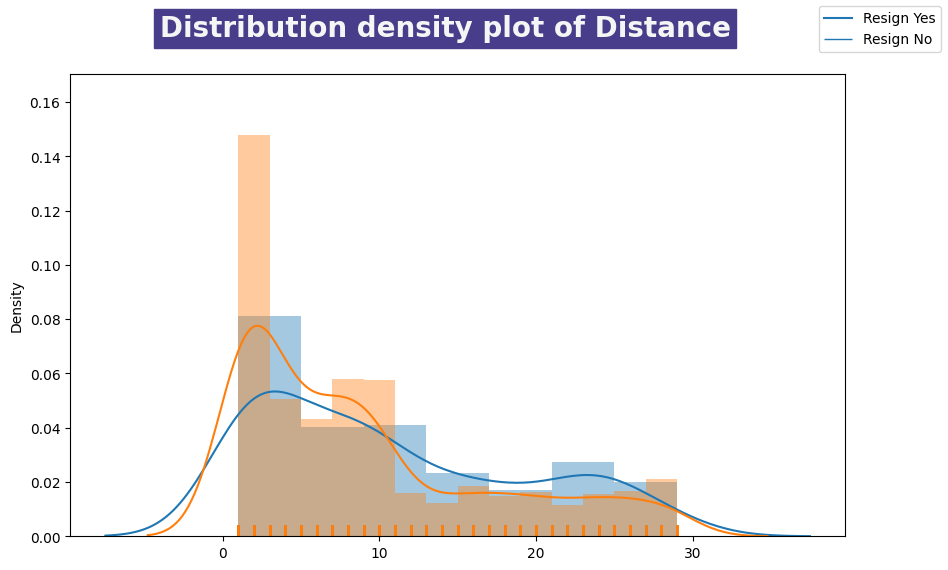

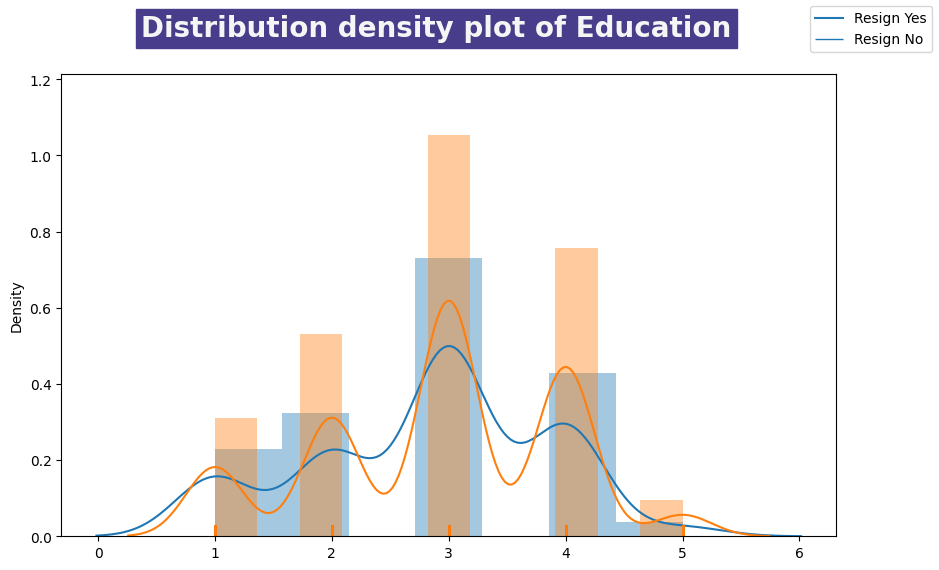

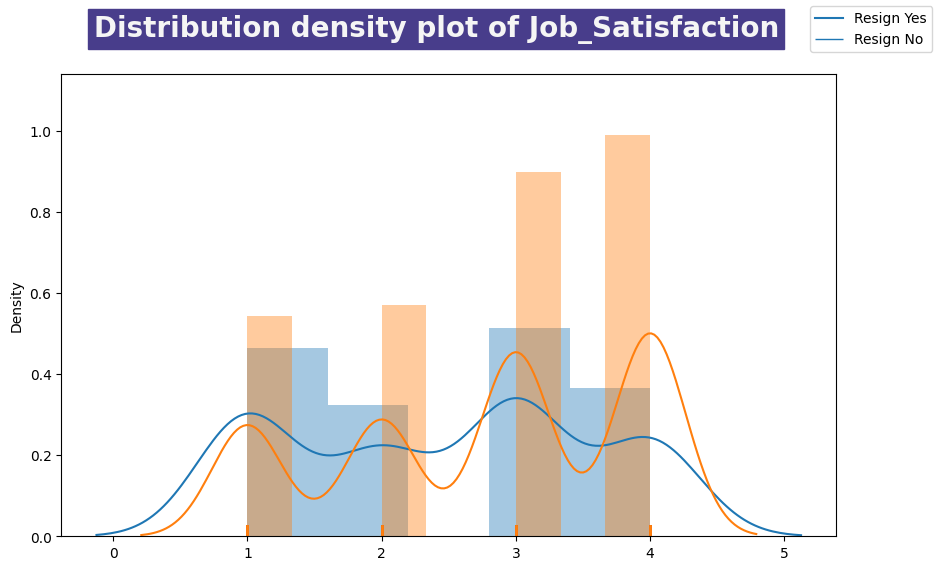

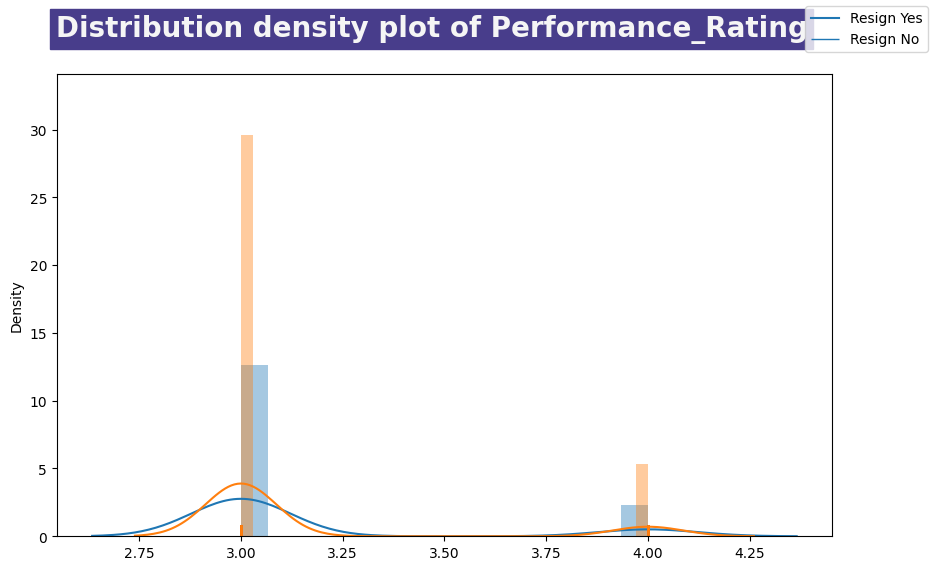

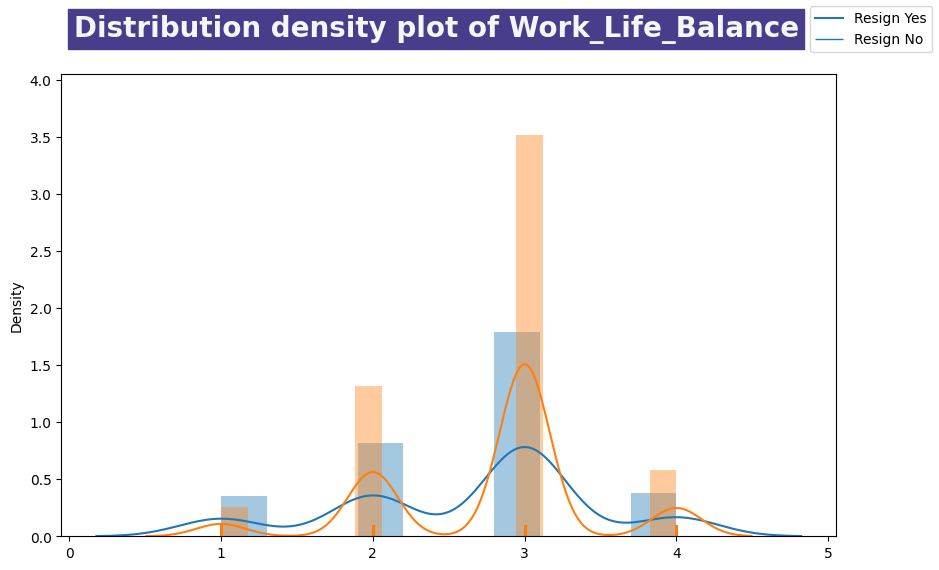

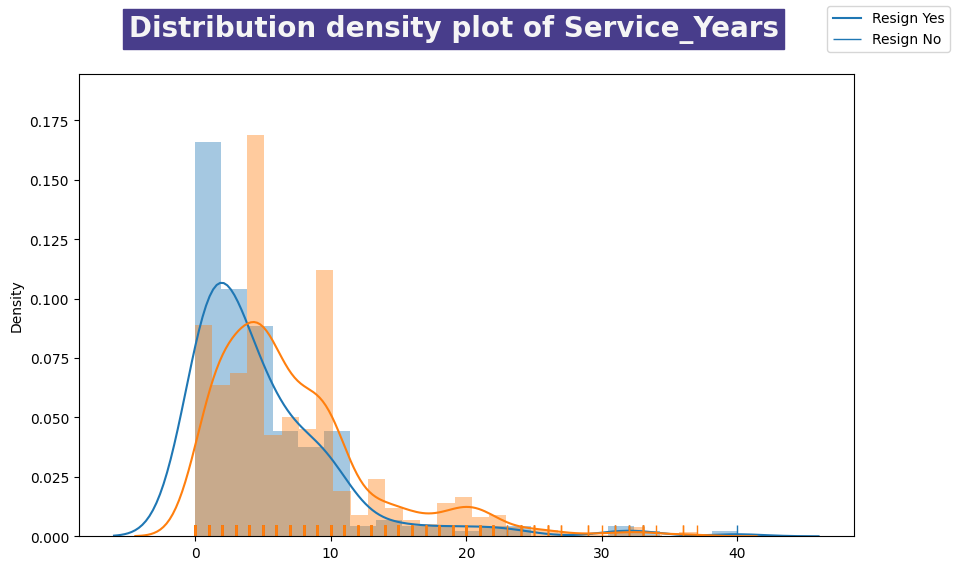

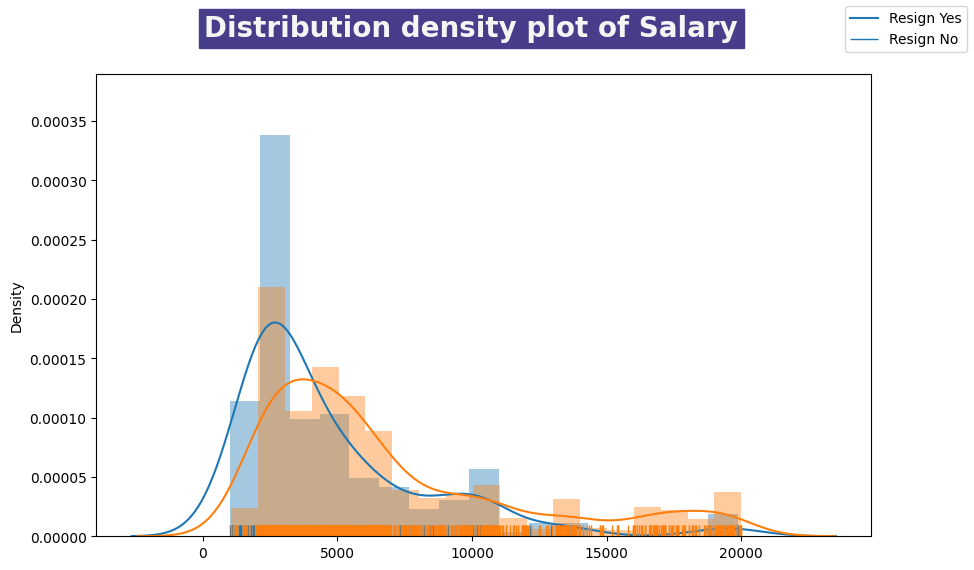

In [ ]:
df_eda_resign = df_eda[df_eda['Resign Status']=='Yes']
df_eda_normal = df_eda[df_eda['Resign Status']=='No']

# df_eda_melt = df_eda.melt(['Machine Status'],value_vars=['Ambient T (C)', 'Process T (C)', 'Rotation Speed (rpm)','Torque (Nm)'], var_name='cols',  value_name='vals')

features = ['Age','Distance','Education', 'Job_Satisfaction','Performance_Rating', 'Work_Life_Balance', 'Service_Years', 'Salary']	

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    for i in features:
      fig = plt.figure(figsize=(10,6))
      sns.distplot(df_eda_resign[[i]], hist=True, rug=True)
      sns.distplot(df_eda_normal[[i]], hist=True, rug=True)

      fig.suptitle(f'Distribution density plot of {i}',color='whitesmoke',weight='bold',size=20, backgroundcolor= 'darkslateblue')

      fig.legend(labels=['Resign Yes','Resign No'])
      plt.show()

Observations:

* Age follows a gaussian distribution
* Service Year seems to be very positively skewed
* 

# Feature Processing

Centroid-based Clustering models like K-means algorithm assumes the following

* Symmetric distribution of variables (not skewed)
* Variables with same average values
* Variables with same variance

This is because under the hood, k-means algorithm uses Euclidean distance to measure the similarities between objects

Hence we need to process our data to fit those assumptions

---
Workflow:
1. De-skew 
2. Scale features to [0-1] using min max scalar
3. Ordinal Encode `BusinessTravel`
4. One-Hot-Encode the rest of categorical features

In [5]:
df = df_raw.copy()

### Utility function to Visulize preprocessed dataset

In [19]:
# Plot distribution of each numerical feature

def plot_distribution(df, features,title):
    '''
    Plots the distribution of each feature in the choosen dataframe.
    '''
    fig = make_subplots(rows=len(features), cols=1)
    for idx,feature in enumerate(features):
        fig.append_trace(go.Histogram(x=df[feature], name=feature), row=idx+1, col=1)
        # add suptitle
        fig.update_xaxes(title_text=feature, row=idx+1, col=1)
        # Increase height of subplot
    fig.update_layout(height=1200, width=800, title_text=title)
    fig.show()

## Encoding Categorical Variables

Convert the categorical features to its numeric representation for

In [6]:
# Label Encode Ordinal Feature Business Travel
from sklearn.preprocessing import LabelEncoder
encoded = LabelEncoder()
encoded.fit([
        ['Non-Travel'],
        ['Travel_Rarely'],
        ['Travel_Frequently']
    ])

df['BusinessTravel'] = encoded.transform(df_raw['BusinessTravel'])

display(df['BusinessTravel'])

c:\Users\Kaleb Nim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



0       2
1       1
2       2
3       1
4       2
       ..
1465    1
1466    2
1467    2
1468    1
1469    2
Name: BusinessTravel, Length: 1470, dtype: int32

In [7]:
# One-hot encode Categorical Features
df_onehot = pd.get_dummies(df, drop_first=True)
df_onehot.head()

,Age,BusinessTravel,Distance,Education,Job_Satisfaction,Salary,Performance_Rating,Work_Life_Balance,Service_Years,Gender_Male,Job Function_Research & Development,Job Function_Sales,MaritalStatus_Married,MaritalStatus_Single,Resign Status_Yes
0,41,2,1,2,4,5993,3,1,6,0,0,1,0,1,1
1,49,1,8,1,2,5130,4,3,10,1,1,0,1,0,0
2,37,2,2,2,3,2090,3,3,0,1,1,0,0,1,1
3,33,1,3,4,3,2909,3,3,8,0,1,0,1,0,0
4,27,2,2,1,2,3468,3,3,2,1,1,0,1,0,0


## Normalize Data

Use QuantileTransformer to transform positively skewed features `Distance`, `Salary`, `Service_Years` to Gassuian distribution

In [8]:
# Log Transform Distance, Salary, Service Years
from sklearn.preprocessing import QuantileTransformer
df_deskewd = df_onehot.copy()
transform_features = ['Distance', 'Salary', 'Service_Years']

quantile_transformer = QuantileTransformer(output_distribution='normal',random_state=0)
df_deskewd[transform_features] = quantile_transformer.fit_transform(df_onehot[transform_features])


In [20]:
plot_distribution(df_deskewd, transform_features, 'Distribution of heavily positively skewed Features')

## Scaling 

K-means clustering is "isotropic" in all directions of space and therefore tends to produce more or less round (rather than elongated) clusters. Therefore, leaving variances unequal is equivalent to putting more weight on variables with smaller variance, so clusters will tend to be separated along variables with greater variance.
[Reference](https://stats.stackexchange.com/questions/21222/are-mean-normalization-and-feature-scaling-needed-for-k-means-clustering)

Transform data to range [0-1]

In [9]:
df_deskewd_scaled = df_deskewd.copy()

numeric_features = df_deskewd_scaled.select_dtypes(include=['int64', 'float64','int32']).columns
min_max_scaler = MinMaxScaler()

df_deskewd_scaled[numeric_features] = min_max_scaler.fit_transform(df_deskewd[numeric_features])
df_deskewd_scaled

,Age,BusinessTravel,Distance,Education,Job_Satisfaction,Salary,Performance_Rating,Work_Life_Balance,Service_Years,Gender_Male,Job Function_Research & Development,Job Function_Sales,MaritalStatus_Married,MaritalStatus_Single,Resign Status_Yes
0,0.547619,1.0,0.000000,0.25,1.000000,0.529609,0.0,0.000000,0.512948,0,0,1,0,1,1
1,0.738095,0.5,0.513192,0.00,0.333333,0.505671,1.0,0.666667,0.578150,1,1,0,1,0,0
2,0.452381,1.0,0.423517,0.25,0.666667,0.338805,0.0,0.666667,0.000000,1,1,0,0,1,1
3,0.357143,0.5,0.453217,0.75,0.666667,0.434863,0.0,0.666667,0.541819,0,1,0,1,0,0
4,0.214286,1.0,0.423517,0.00,0.333333,0.454264,0.0,0.666667,0.415288,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.428571,0.5,0.621026,0.25,1.000000,0.408309,0.0,0.666667,0.490696,1,1,0,1,0,0
1466,0.500000,1.0,0.487903,0.00,0.000000,0.583717,0.0,0.666667,0.526889,1,1,0,1,0,0
1467,0.214286,1.0,0.466520,0.50,0.333333,0.532074,1.0,0.666667,0.512948,1,1,0,1,0,0
1468,0.738095,0.5,0.423517,0.50,0.333333,0.514597,0.0,0.333333,0.557117,1,0,1,1,0,0


In [21]:
plot_distribution(df_deskewd_scaled, numeric_features, 'Distribution of min_max scaled Features')

In [23]:
# Try dont quantile transform

df_scaled_only = df_onehot.copy()
numeric_features = df_scaled_only.select_dtypes(include=['int64', 'float64','int32']).columns
min_max_scaler = MinMaxScaler()

df_scaled_only[numeric_features] = min_max_scaler.fit_transform(df_scaled_only[numeric_features])


In [25]:
plot_distribution(df_scaled_only, numeric_features, 'Distribution of min_max scaled without Normalizing Features')

# K means Clustering 

K means Clustering is by far the most popular algorithm for clustering data by assign clusters based on the distance towards the cluster centroids iterative. This is due to easy to implement and understand

I will be choosing to set parameters such that the initialization method to be **'k-means++'** which will instead of randomly selecting all initial centers, it chooses only the first center randomly. All following centers are then chosen in a way that they have the maximum distance between the new center and all already existing centers. This reduces the initialization sensitivity that would affect the final formed clusters. 
[Reference: TowardsDataScience (A deep dive into k-means)](https://towardsdatascience.com/a-deep-dive-into-k-means-f9a1ef2490f8#:~:text=Cluster%20magnitude%20describes%20the%20total,to%20the%20cluster%20cardinality%20alone.)

In [26]:

def kmeanMetrics_result(n_cluster: int, X: Sequence)-> Tuple[float, Sequence, Sequence, sklearn.cluster._kmeans.KMeans]:
    '''
    General Function to returns commonly used metrics for K-Means Clustering and the fitted instance
    '''
    kmean = KMeans(n_clusters = n_cluster, random_state=24,init='k-means++') # Initialize K-Means with k-means++ algorithm'
    cluster_labels = kmean.fit_predict(X)
    return kmean.inertia_, cluster_labels, kmean.cluster_centers_, kmean

In [27]:
def cluster_results(data,details= True):
    ''''
    Function takes in dataset with cluster labels, returns mean of the clustering results + Cardinality and cluster size as % of total 
    '''
    cluster_centers = data.groupby('Cluster').mean()
    cluster_centers['Cluster Size (% of Total)'] = pd.Series(data['Cluster']).value_counts() / len(data['Cluster']) * 100
    cluster_centers['Cardinality'] = pd.Series(data['Cluster']).value_counts()

    if details:
        cluster_centers.columns = [f'{col} mean' for col in cluster_centers.columns] # Add "mean" to column names
        return cluster_centers
    else:
        return cluster_centers[['Cluster Size (% of Total)','Cardinality']]

In [20]:
# Fit kmeans to scaled data and predict clusters, assign cluster labels back to unscaled data for interpretation
kmeans_df = df_deskewd_scaled.copy()
df_raw_cluster = df_raw.copy() # Unscaled data for interpretation
inertia , cluster_labels, cluster_centers, kmeans = kmeanMetrics_result(n_cluster=8, X=kmeans_df) # n_cluster set to sklearn default value of 8
df_raw_cluster['Cluster'] = cluster_labels
cluster_analysis= cluster_results(df_raw_cluster,details=True)

In [21]:
# Extract cluster magnitude for each cluster
cluster_analysis['Cluster Magnitude'] = cluster_analysis.index.map(lambda x: np.linalg.norm(cluster_centers[x]))

### Cluster Results

Using the default values of n_samples (k) = 8, 

,Age mean,Distance mean,Education mean,Job_Satisfaction mean,Salary mean,Performance_Rating mean,Work_Life_Balance mean,Service_Years mean,Cluster Size (% of Total) mean,Cardinality mean,Cluster Magnitude
Cluster,,,,,,,,,,,
0,36.347418,9.079812,2.990610,2.685446,6212.859155,3.150235,2.746479,7.075117,14.489796,213,1.955459
1,37.354369,9.708738,2.878641,2.762136,7270.514563,3.131068,2.810680,7.723301,14.013605,206,2.211424
2,35.875862,10.110345,3.089655,2.786207,6875.531034,3.131034,2.779310,7.331034,9.863946,145,2.231019
3,37.346405,8.823529,2.777778,2.732026,6573.189542,3.137255,2.732026,7.222222,10.408163,153,2.045427
4,35.562842,8.612022,2.841530,2.803279,5461.819672,3.180328,2.732240,5.868852,12.448980,183,2.320702
5,37.519031,9.418685,2.937716,2.768166,6354.110727,3.162630,2.754325,6.923875,19.659864,289,2.320253
6,38.612360,9.235955,2.904494,2.578652,6955.488764,3.179775,2.696629,7.449438,12.108844,178,2.105838
7,35.932039,7.970874,2.844660,2.679612,6423.941748,3.145631,2.893204,6.165049,7.006803,103,1.952767


<AxesSubplot:xlabel='Cluster'>

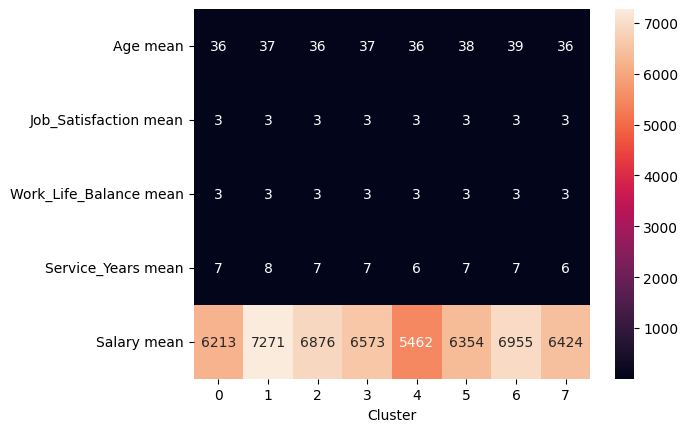

In [23]:
features_plotted = ['Age mean', 'Job_Satisfaction mean', 'Work_Life_Balance mean', 'Service_Years mean', 'Salary mean']
display(cluster_analysis)
sns.heatmap(cluster_analysis[features_plotted].T, annot=True, fmt=".0f")

### t-SNE

We will be utilizing t-Distributed Stochastic Neighbor Embedding (t-SNE) to help us visualize our high dimensinal dataset in two diemnsions.

The reason why I choose TSNE over PCA to visualize high dimensionality, is that TSNE preserves only small pairwise distances or local similarities whereas PCA is concerned with preserving large pairwise distances to maximize variance. Furthermore, PCA is a linear dimension reduction technique which would lead to poor visualization especially when dealing with non-linear relationships.

To illustrate, here's a side by side comparism between PCA and t-SNE on the MNIST dataset

![PCA-VS-t-SNE](../Images/PCA-vs-TSNE.png)

[References:Towards Data Science (An introduction to t-SNE)](https://towardsdatascience.com/an-introduction-to-t-sne-with-python-example-5a3a293108d1)

One key parameter of t-SNE is the perplexity 

The optimal perplexity can be calculated from the number of cells according to the simple power law Perplexity ~ N^(1/2)

In [57]:
def plotTSNE(df_cluster_labelled,n_clusters,n_components=2,clustering=True):
    '''
    Function takes in a dataframe with cluster labels and plots the data in 2D using t-SNE
    '''
    optimal_perplexity = round(np.sqrt(kmeans_df.shape[0])) # Calculate optimal perplexity value 
    tsne = TSNE(n_components=n_components, learning_rate='auto', init='random', perplexity=optimal_perplexity)
    df_without_cluster = df_cluster_labelled.drop(['Cluster'], axis=1)
    tsne_results = tsne.fit_transform(df_without_cluster)
    display(df_without_cluster)
    # plotly 
    if clustering:
        fig = px.scatter(x=tsne_results[:,0], y=tsne_results[:,1], color=df_cluster_labelled['Cluster'])
        fig.update_layout(title="TSNE plot of k = {} ".format(n_clusters))
    else:
        fig = px.scatter(x=tsne_results[:,0], y=tsne_results[:,1]) # dont color points by cluster
        fig.update_layout(title="TSNE plot of k = {} ".format(n_clusters))
    return fig 


In [59]:
kmeans_df['Cluster'] = cluster_labels
fig = plotTSNE(kmeans_df,n_clusters =8, n_components=2,clustering=True)
fig.show()

,Age,BusinessTravel,Distance,Education,Job_Satisfaction,Salary,Performance_Rating,Work_Life_Balance,Service_Years,Gender_Male,Job Function_Research & Development,Job Function_Sales,MaritalStatus_Married,MaritalStatus_Single,Resign Status_Yes
0,0.547619,1.0,0.000000,0.25,1.000000,0.529609,0.0,0.000000,0.512948,0,0,1,0,1,1
1,0.738095,0.5,0.513192,0.00,0.333333,0.505671,1.0,0.666667,0.578150,1,1,0,1,0,0
2,0.452381,1.0,0.423517,0.25,0.666667,0.338805,0.0,0.666667,0.000000,1,1,0,0,1,1
3,0.357143,0.5,0.453217,0.75,0.666667,0.434863,0.0,0.666667,0.541819,0,1,0,1,0,0
4,0.214286,1.0,0.423517,0.00,0.333333,0.454264,0.0,0.666667,0.415288,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.428571,0.5,0.621026,0.25,1.000000,0.408309,0.0,0.666667,0.490696,1,1,0,1,0,0
1466,0.500000,1.0,0.487903,0.00,0.000000,0.583717,0.0,0.666667,0.526889,1,1,0,1,0,0
1467,0.214286,1.0,0.466520,0.50,0.333333,0.532074,1.0,0.666667,0.512948,1,1,0,1,0,0
1468,0.738095,0.5,0.423517,0.50,0.333333,0.514597,0.0,0.333333,0.557117,1,0,1,1,0,0


##

## Determine the best possible value of k.

There isn't a definitive set of rules to automatically extract the optimal number of K clusters. In most cases the better way of choosing the number of clusters is to ask 

> "For what purpose are we using K-means"


From there think about what is the optimal number of clusters to serve our purpose. For our problem statement, our ultimate goal is to find out "*Which group of employee is the most vulnerable for resignation*". From my human intution, I can currently only logically determin 5-10 different types of Employees that would share similar needs for each cluster. However, this 5-10 range is completely ambigious from my own intuition. 

Therefore, we would require a more systemtic method of choosing optimal number of K

### Methods for choosing K

There are a few visual methods that can aid us in choosing No.K which includes:



*   Elbow Method
*   List item

Following the Elbow plot, we will be making use of of the Silhouette Clustering for to validate the number of k chosen by the elbow plot for  clustering models.


There isn't a definitive set of rules to automatically extract the optimal number of K

## Elbow Plot 

To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the inertia start decreasing in a linear fashion.

$$ \text{Inertia} = \sum^m_{i=1}||x^{(i)}-\mu_{c^{(i)}}||^2_2 $$

- $m$ : Number of Datapoints
- $x^{(i)}$ : i-th Datapoints
- $\mu_{c^{(i)}}$ : Cluster Centroids for i-th Datapoints

> Inertia Measure the Sum of Squared Distance of each datapoints to its assigned cluster centroids.

However, I personally do not believe that using our human intuition to "Eyeball" where the elbow is to be optimal. Hence I'll be using **Kneed** package to compute the optimal elbow automatically.

## Slihotte tingy

In [72]:
kmeans_df

,Age,BusinessTravel,Distance,Education,Job_Satisfaction,Salary,Performance_Rating,Work_Life_Balance,Service_Years,Gender_Male,Job Function_Research & Development,Job Function_Sales,MaritalStatus_Married,MaritalStatus_Single,Resign Status_Yes,Cluster
0,0.547619,1.0,0.000000,0.25,1.000000,0.529609,0.0,0.000000,0.512948,0,0,1,0,1,1,1
1,0.738095,0.5,0.513192,0.00,0.333333,0.505671,1.0,0.666667,0.578150,1,1,0,1,0,0,5
2,0.452381,1.0,0.423517,0.25,0.666667,0.338805,0.0,0.666667,0.000000,1,1,0,0,1,1,4
3,0.357143,0.5,0.453217,0.75,0.666667,0.434863,0.0,0.666667,0.541819,0,1,0,1,0,0,0
4,0.214286,1.0,0.423517,0.00,0.333333,0.454264,0.0,0.666667,0.415288,1,1,0,1,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.428571,0.5,0.621026,0.25,1.000000,0.408309,0.0,0.666667,0.490696,1,1,0,1,0,0,5
1466,0.500000,1.0,0.487903,0.00,0.000000,0.583717,0.0,0.666667,0.526889,1,1,0,1,0,0,5
1467,0.214286,1.0,0.466520,0.50,0.333333,0.532074,1.0,0.666667,0.512948,1,1,0,1,0,0,5
1468,0.738095,0.5,0.423517,0.50,0.333333,0.514597,0.0,0.333333,0.557117,1,0,1,1,0,0,3


In [90]:
k_range = np.arange(2,12,1) # Max 12 clusters
  
k_results = pd.DataFrame(columns=['k','inertia','silhouette_score'])

for idx, k in enumerate(k_range):
    k_means_range_df =  df_scaled_only.copy() # Reset k_means_range_df to original dataframe to assign cluster labels
    inertia , cluster_labels, cluster_centers, kmeans = kmeanMetrics_result(n_cluster=k, X=k_means_range_df) # n_cluster set to sklearn default value of 8
    k_means_range_df['Cluster'] = cluster_labels

    print(np.unique(cluster_labels))

    k_results.loc[idx] = [k,inertia,silhouette_score(k_means_range_df, cluster_labels)]


[0 1]
[0 1 2]
[0 1 2 3]
[0 1 2 3 4]
[0 1 2 3 4 5]
[0 1 2 3 4 5 6]
[0 1 2 3 4 5 6 7]
[0 1 2 3 4 5 6 7 8]
[0 1 2 3 4 5 6 7 8 9]
[ 0  1  2  3  4  5  6  7  8  9 10]
[ 0  1  2  3  4  5  6  7  8  9 10 11]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]
[ 0  1  2  3  4  5  6  7  8  9 10

,k,inertia,silhouette_score
0,2.0,2336.177870,0.285989
1,3.0,2001.613425,0.332368
2,4.0,1844.499716,0.373817
3,5.0,1700.533067,0.312381
4,6.0,1605.457248,0.345569
5,7.0,1528.316876,0.376918
6,8.0,1441.082032,0.415865
7,9.0,1391.705335,0.384253
8,10.0,1353.056432,0.388751
9,11.0,1306.591290,0.402046


In [75]:
k_range = np.arange(2,30,1) # Max 12 clusters

k_results = pd.DataFrame(columns=['k','inertia','silhouette_score'])

for idx, k in enumerate(k_range):
    k_means_range_df = df_deskewd_scaled.copy() # Reset k_means_range_df to original dataframe to assign cluster labels
    inertia , cluster_labels, cluster_centers, kmeans = kmeanMetrics_result(n_cluster=k, X=k_means_range_df) # n_cluster set to sklearn default value of 8
    k_means_range_df['Cluster'] = cluster_labels
    k_results.loc[idx] = [k,inertia,silhouette_score(k_means_range_df, cluster_labels)]
display(k_results)

,k,inertia,silhouette_score
0,2.0,2187.283814,0.299037
1,3.0,1852.793932,0.348764
2,4.0,1691.253233,0.346487
3,5.0,1557.483275,0.375175
4,6.0,1443.239578,0.423811
5,7.0,1383.904401,0.391973
6,8.0,1302.730800,0.382179
7,9.0,1253.754939,0.434210
8,10.0,1205.161046,0.425337
9,11.0,1162.801891,0.418488



However, I personally do not believe that using our human intuition to "Eyeball" where the elbow is to be optimal. Hence I'll be using **Kneed** package to compute the optimal elbow automatically.

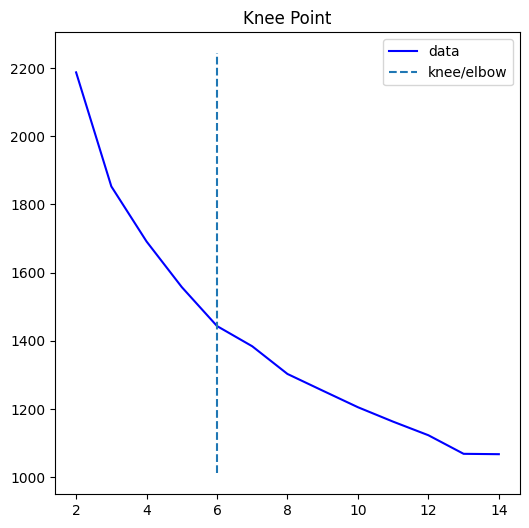

In [32]:
from kneed import KneeLocator

kl = KneeLocator(k_results['k'], k_results['inertia'], curve="convex",direction="decreasing")
kl.plot_knee()

In [76]:
#Plotly plot silhouette score
fig = px.line(x=k_results['k'], y=k_results['silhouette_score'])
# label x-axis k
fig.update_xaxes(title="k")
# label y-axis silhouette score
fig.update_yaxes(title="silhouette coefficient")
fig.update_layout(title="Silhouette Score")
fig.show()

In [66]:
kmeans_df

,Age,BusinessTravel,Distance,Education,Job_Satisfaction,Salary,Performance_Rating,Work_Life_Balance,Service_Years,Gender_Male,Job Function_Research & Development,Job Function_Sales,MaritalStatus_Married,MaritalStatus_Single,Resign Status_Yes,Cluster
0,0.547619,1.0,0.000000,0.25,1.000000,0.529609,0.0,0.000000,0.512948,0,0,1,0,1,1,1
1,0.738095,0.5,0.513192,0.00,0.333333,0.505671,1.0,0.666667,0.578150,1,1,0,1,0,0,5
2,0.452381,1.0,0.423517,0.25,0.666667,0.338805,0.0,0.666667,0.000000,1,1,0,0,1,1,4
3,0.357143,0.5,0.453217,0.75,0.666667,0.434863,0.0,0.666667,0.541819,0,1,0,1,0,0,0
4,0.214286,1.0,0.423517,0.00,0.333333,0.454264,0.0,0.666667,0.415288,1,1,0,1,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.428571,0.5,0.621026,0.25,1.000000,0.408309,0.0,0.666667,0.490696,1,1,0,1,0,0,5
1466,0.500000,1.0,0.487903,0.00,0.000000,0.583717,0.0,0.666667,0.526889,1,1,0,1,0,0,5
1467,0.214286,1.0,0.466520,0.50,0.333333,0.532074,1.0,0.666667,0.512948,1,1,0,1,0,0,5
1468,0.738095,0.5,0.423517,0.50,0.333333,0.514597,0.0,0.333333,0.557117,1,0,1,1,0,0,3


In [64]:
score = silhouette_score(kmeans_df, cluster_labels)
score

0.42381143460610216

## Silhoutte Analysis

add some stuff here

In [70]:
figures = []
range_n_clusters = [2, 3, 4, 5, 6]
'''
Reference: https://chart-studio.plotly.com/~Diksha_Gabha/2853.embed
'''
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig = make_subplots(rows=1, cols=2,
                              print_grid=False,
                              subplot_titles=('The silhouette plot for the various clusters.',
                                              'The visualization of the clustered data.'))

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    fig['layout']['xaxis1'].update(title='The silhouette coefficient values',
                                   range=[-0.1, 1])
   
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    fig['layout']['yaxis1'].update(title='Cluster label',
                                   showticklabels=False,
                                   range=[0, len(kmeans_df) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.

    df_deskewd_scaled_cluster = df_deskewd_scaled.copy() # Reset k_means_range_df to original dataframe to assign cluster labels
    inertia , cluster_labels, cluster_centers, kmeans = kmeanMetrics_result(n_cluster=n_clusters, X=df_deskewd_scaled)
    df_deskewd_scaled_cluster['Cluster'] = cluster_labels
    # clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    # cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_deskewd_scaled, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_deskewd_scaled_cluster, cluster_labels)
    y_lower = 10
    
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        cmap = cm.get_cmap("Spectral")
        colors = cmap(cluster_labels.astype(float) / n_clusters)
        # colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
        
        filled_area = go.Scatter(y=np.arange(y_lower, y_upper),
                                 x=ith_cluster_silhouette_values,
                                 mode='lines',
                                 showlegend=False,
                                 line=dict(width=0.5
                                          ),
                                 fill='tozerox')
        fig.append_trace(filled_area, 1, 1)
        
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
        

    # The vertical line for average silhouette score of all the values
    axis_line = go.Scatter(x=[silhouette_avg],
                           y=[0, 10],
                           showlegend=False,
                           mode='lines',
                           line=dict(color="red", dash='dash',
                                     width =1) )

    fig.append_trace(axis_line, 1, 1)
    
    # # 2nd Plot showing the actual clusters formed
    # colors = matplotlib.colors.colorConverter.to_rgb(cm.spectral(float(i) / n_clusters))
    # colors = 'rgb'+str(colors)
    # clusters = go.Scatter(x=kmeans_df[:, 0], 
    #                       y=kmeans_df[:, 1], 
    #                       showlegend=False,
    #                       mode='markers',
    #                       marker=dict(color=colors,
    #                                  size=4)
    #                      )
    
    # fig.append_trace(clusters, 1, 2)
    
    # # Labeling the clusters
    # centers_ = cluster_centers
    # # Draw white circles at cluster centers
    # centers = go.Scatter(x=centers_[:, 0], 
    #                      y=centers_[:, 1],
    #                      showlegend=False,
    #                      mode='markers',
    #                      marker=dict(color='green', size=10,
    #                                  line=dict(color='black',
    #                                                          width=1))
    #                     )
    tsne = plotTSNE(df_deskewd_scaled_cluster,n_clusters =n_clusters, n_components=2,clustering=True)
    tsne.show()
    # fig.append_trace(tsne, 1, 2)
    
    fig['layout']['xaxis2'].update(title='Feature space for the 1st feature',
                                   zeroline=False)
    fig['layout']['yaxis2'].update(title='Feature space for the 2nd feature',
                                  zeroline=False)
                              

    fig['layout'].update(title="Silhouette analysis for KMeans clustering on sample data "
                         "with n_clusters = %d" % n_clusters)
    fig.show()
    figures.append(fig)


For n_clusters = 2 The average silhouette_score is : 0.22635965900791785


,Age,BusinessTravel,Distance,Education,Job_Satisfaction,Salary,Performance_Rating,Work_Life_Balance,Service_Years,Gender_Male,Job Function_Research & Development,Job Function_Sales,MaritalStatus_Married,MaritalStatus_Single,Resign Status_Yes
0,0.547619,1.0,0.000000,0.25,1.000000,0.529609,0.0,0.000000,0.512948,0,0,1,0,1,1
1,0.738095,0.5,0.513192,0.00,0.333333,0.505671,1.0,0.666667,0.578150,1,1,0,1,0,0
2,0.452381,1.0,0.423517,0.25,0.666667,0.338805,0.0,0.666667,0.000000,1,1,0,0,1,1
3,0.357143,0.5,0.453217,0.75,0.666667,0.434863,0.0,0.666667,0.541819,0,1,0,1,0,0
4,0.214286,1.0,0.423517,0.00,0.333333,0.454264,0.0,0.666667,0.415288,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.428571,0.5,0.621026,0.25,1.000000,0.408309,0.0,0.666667,0.490696,1,1,0,1,0,0
1466,0.500000,1.0,0.487903,0.00,0.000000,0.583717,0.0,0.666667,0.526889,1,1,0,1,0,0
1467,0.214286,1.0,0.466520,0.50,0.333333,0.532074,1.0,0.666667,0.512948,1,1,0,1,0,0
1468,0.738095,0.5,0.423517,0.50,0.333333,0.514597,0.0,0.333333,0.557117,1,0,1,1,0,0


For n_clusters = 3 The average silhouette_score is : 0.20043714413581903


,Age,BusinessTravel,Distance,Education,Job_Satisfaction,Salary,Performance_Rating,Work_Life_Balance,Service_Years,Gender_Male,Job Function_Research & Development,Job Function_Sales,MaritalStatus_Married,MaritalStatus_Single,Resign Status_Yes
0,0.547619,1.0,0.000000,0.25,1.000000,0.529609,0.0,0.000000,0.512948,0,0,1,0,1,1
1,0.738095,0.5,0.513192,0.00,0.333333,0.505671,1.0,0.666667,0.578150,1,1,0,1,0,0
2,0.452381,1.0,0.423517,0.25,0.666667,0.338805,0.0,0.666667,0.000000,1,1,0,0,1,1
3,0.357143,0.5,0.453217,0.75,0.666667,0.434863,0.0,0.666667,0.541819,0,1,0,1,0,0
4,0.214286,1.0,0.423517,0.00,0.333333,0.454264,0.0,0.666667,0.415288,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.428571,0.5,0.621026,0.25,1.000000,0.408309,0.0,0.666667,0.490696,1,1,0,1,0,0
1466,0.500000,1.0,0.487903,0.00,0.000000,0.583717,0.0,0.666667,0.526889,1,1,0,1,0,0
1467,0.214286,1.0,0.466520,0.50,0.333333,0.532074,1.0,0.666667,0.512948,1,1,0,1,0,0
1468,0.738095,0.5,0.423517,0.50,0.333333,0.514597,0.0,0.333333,0.557117,1,0,1,1,0,0


For n_clusters = 4 The average silhouette_score is : 0.21290723883497664


,Age,BusinessTravel,Distance,Education,Job_Satisfaction,Salary,Performance_Rating,Work_Life_Balance,Service_Years,Gender_Male,Job Function_Research & Development,Job Function_Sales,MaritalStatus_Married,MaritalStatus_Single,Resign Status_Yes
0,0.547619,1.0,0.000000,0.25,1.000000,0.529609,0.0,0.000000,0.512948,0,0,1,0,1,1
1,0.738095,0.5,0.513192,0.00,0.333333,0.505671,1.0,0.666667,0.578150,1,1,0,1,0,0
2,0.452381,1.0,0.423517,0.25,0.666667,0.338805,0.0,0.666667,0.000000,1,1,0,0,1,1
3,0.357143,0.5,0.453217,0.75,0.666667,0.434863,0.0,0.666667,0.541819,0,1,0,1,0,0
4,0.214286,1.0,0.423517,0.00,0.333333,0.454264,0.0,0.666667,0.415288,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.428571,0.5,0.621026,0.25,1.000000,0.408309,0.0,0.666667,0.490696,1,1,0,1,0,0
1466,0.500000,1.0,0.487903,0.00,0.000000,0.583717,0.0,0.666667,0.526889,1,1,0,1,0,0
1467,0.214286,1.0,0.466520,0.50,0.333333,0.532074,1.0,0.666667,0.512948,1,1,0,1,0,0
1468,0.738095,0.5,0.423517,0.50,0.333333,0.514597,0.0,0.333333,0.557117,1,0,1,1,0,0


For n_clusters = 5 The average silhouette_score is : 0.2055567397497118


,Age,BusinessTravel,Distance,Education,Job_Satisfaction,Salary,Performance_Rating,Work_Life_Balance,Service_Years,Gender_Male,Job Function_Research & Development,Job Function_Sales,MaritalStatus_Married,MaritalStatus_Single,Resign Status_Yes
0,0.547619,1.0,0.000000,0.25,1.000000,0.529609,0.0,0.000000,0.512948,0,0,1,0,1,1
1,0.738095,0.5,0.513192,0.00,0.333333,0.505671,1.0,0.666667,0.578150,1,1,0,1,0,0
2,0.452381,1.0,0.423517,0.25,0.666667,0.338805,0.0,0.666667,0.000000,1,1,0,0,1,1
3,0.357143,0.5,0.453217,0.75,0.666667,0.434863,0.0,0.666667,0.541819,0,1,0,1,0,0
4,0.214286,1.0,0.423517,0.00,0.333333,0.454264,0.0,0.666667,0.415288,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.428571,0.5,0.621026,0.25,1.000000,0.408309,0.0,0.666667,0.490696,1,1,0,1,0,0
1466,0.500000,1.0,0.487903,0.00,0.000000,0.583717,0.0,0.666667,0.526889,1,1,0,1,0,0
1467,0.214286,1.0,0.466520,0.50,0.333333,0.532074,1.0,0.666667,0.512948,1,1,0,1,0,0
1468,0.738095,0.5,0.423517,0.50,0.333333,0.514597,0.0,0.333333,0.557117,1,0,1,1,0,0


For n_clusters = 6 The average silhouette_score is : 0.20432618556825746


,Age,BusinessTravel,Distance,Education,Job_Satisfaction,Salary,Performance_Rating,Work_Life_Balance,Service_Years,Gender_Male,Job Function_Research & Development,Job Function_Sales,MaritalStatus_Married,MaritalStatus_Single,Resign Status_Yes
0,0.547619,1.0,0.000000,0.25,1.000000,0.529609,0.0,0.000000,0.512948,0,0,1,0,1,1
1,0.738095,0.5,0.513192,0.00,0.333333,0.505671,1.0,0.666667,0.578150,1,1,0,1,0,0
2,0.452381,1.0,0.423517,0.25,0.666667,0.338805,0.0,0.666667,0.000000,1,1,0,0,1,1
3,0.357143,0.5,0.453217,0.75,0.666667,0.434863,0.0,0.666667,0.541819,0,1,0,1,0,0
4,0.214286,1.0,0.423517,0.00,0.333333,0.454264,0.0,0.666667,0.415288,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.428571,0.5,0.621026,0.25,1.000000,0.408309,0.0,0.666667,0.490696,1,1,0,1,0,0
1466,0.500000,1.0,0.487903,0.00,0.000000,0.583717,0.0,0.666667,0.526889,1,1,0,1,0,0
1467,0.214286,1.0,0.466520,0.50,0.333333,0.532074,1.0,0.666667,0.512948,1,1,0,1,0,0
1468,0.738095,0.5,0.423517,0.50,0.333333,0.514597,0.0,0.333333,0.557117,1,0,1,1,0,0


## Refit K-means with optimal k No. of clusters = 6

* Use Min_max dataset without quartile transform

In [28]:
kmeans_optimal_clusters = df_scaled_only.copy()

inertia , cluster_labels, cluster_centers, kmeans = kmeanMetrics_result(n_cluster=6, X=kmeans_optimal_clusters)
kmeans_optimal_clusters['Cluster'] = cluster_labels
final_cluster_results = cluster_results(kmeans_optimal_clusters)

In [44]:
def calculateRelativeDifferences(results):
    # Extract all column names from results dataframe
    column_names = results.columns.values
    # Create a new dataframe to store the relative differences
    relative_differences = pd.DataFrame(columns=column_names+ ['Relative Difference'])
    # Iterate through all the columns in the results dataframe
    for column in column_names:
        for index in range(len(results)):
            # Calculate the relative difference between the current value and the mean value
            relative_differences.loc[index, column+'Relative Difference'] = (results.loc[index, column]-results.loc[:, column].mean())*100 / results.loc[:, column].mean()
    return relative_differences    

In [48]:
final_cluster_results

,Age mean,BusinessTravel mean,Distance mean,Education mean,Job_Satisfaction mean,Salary mean,Performance_Rating mean,Work_Life_Balance mean,Service_Years mean,Gender_Male mean,Job Function_Research & Development mean,Job Function_Sales mean,MaritalStatus_Married mean,MaritalStatus_Single mean,Resign Status_Yes mean,Cluster Size (% of Total) mean,Cardinality mean
Cluster,,,,,,,,,,,,,,,,,
0,0.487242,0.835849,0.297574,0.483962,0.527044,0.308647,0.169811,0.568553,0.186509,0.000000,0.943396,0.000000,0.671698,0.000000,0.105660,18.027211,265
1,0.438735,0.770149,0.276013,0.453731,0.589055,0.261667,0.161194,0.576119,0.162537,1.000000,0.943284,0.000000,0.000000,0.543284,0.182090,22.789116,335
2,0.464739,0.816609,0.300667,0.484429,0.589389,0.281470,0.162630,0.584775,0.173097,1.000000,0.920415,0.000000,1.000000,0.000000,0.117647,19.659864,289
3,0.459785,0.809187,0.305654,0.481449,0.588928,0.332910,0.141343,0.604240,0.193286,0.568905,0.000000,1.000000,0.727915,0.000000,0.102473,19.251701,283
4,0.410448,0.805970,0.288113,0.498134,0.584577,0.258642,0.141791,0.592040,0.167164,0.000000,0.962687,0.000000,0.000000,1.000000,0.156716,9.115646,134
5,0.407375,0.786585,0.285279,0.486280,0.577236,0.278136,0.128049,0.609756,0.161890,0.591463,0.000000,0.993902,0.000000,0.939024,0.390244,11.156463,164


In [49]:
relative_differences = calculateRelativeDifferences(final_cluster_results)
display(relative_differences)

,Age meanRelative Difference,BusinessTravel meanRelative Difference,Distance meanRelative Difference,Education meanRelative Difference,Job_Satisfaction meanRelative Difference,Salary meanRelative Difference,Performance_Rating meanRelative Difference,Work_Life_Balance meanRelative Difference,Service_Years meanRelative Difference,Gender_Male meanRelative Difference,Job Function_Research & Development meanRelative Difference,Job Function_Sales meanRelative Difference,MaritalStatus_Married meanRelative Difference,MaritalStatus_Single meanRelative Difference,Resign Status_Yes meanRelative Difference,Cluster Size (% of Total) meanRelative Difference,Cardinality meanRelative Difference
0,9.561331,3.953781,1.833402,0.546655,-8.50535,7.575554,12.604775,-3.51192,7.139632,-100.0,50.151334,-100.0,67.951589,-100.0,-39.899152,8.163265,8.163265
1,-1.345923,-4.217243,-5.545141,-5.734037,2.259685,-8.798991,6.890503,-2.227919,-6.631062,89.851308,50.133405,-100.0,-100.0,31.317368,3.57465,36.734694,36.734694
2,4.501332,1.560912,2.891933,0.643637,2.317662,-1.896858,7.842559,-0.75898,-0.565156,89.851308,46.493668,-100.0,150.040287,-100.0,-33.080988,17.959184,17.959184
3,3.387325,0.63788,4.598333,0.024457,2.237711,16.032133,-6.273214,2.54442,11.03253,8.007281,-100.0,200.917431,82.008124,-100.0,-41.711885,15.510204,15.510204
4,-7.706578,0.237769,-1.404305,3.491004,1.482373,-9.853075,-5.975947,0.4739,-3.973176,-100.0,53.221593,-100.0,-100.0,141.71054,-10.857883,-45.306122,-45.306122
5,-8.397487,-2.173099,-2.374222,1.028283,0.207919,-3.058762,-15.088676,3.480498,-7.002768,12.290103,-100.0,199.082569,-100.0,126.972092,121.975259,-33.061224,-33.061224


# Interpretating k-means



* Relative differences to the average value plot on a radar chart
 * Describe charateristic 
 
[Reference:](https://towardsdatascience.com/the-easiest-way-to-interpret-clustering-result-8137e488a127)

In [77]:
# Plot multiple radar charts to show the relative differences between the clusters
import plotly.graph_objects as go
fig = go.Figure()

for i in range(len(relative_differences)):
    fig.add_trace(go.Scatterpolar(
        # get the relative differences for the current cluster
        r=relative_differences.iloc[i, :-1].values,
        theta=relative_differences.columns[:-1],
        fill='toself',
        name="Cluster: {}".format(relative_differences.index[i])
    ))
fig.show()


In [ ]:
inertia , cluster_labels, cluster_centers, kmeans = kmeanMetrics_result(n_cluster=6, X=kmeans_df) # n_cluster set to sklearn default value of 8


# k-prototypes

k-prototypes is somewhat mixture of k-means and k-modes. The important thing to note is k-prototypes algorithm can **handle both numerical and categorical features simultaneously**

Categorical features do not need to be processed at all, instead you have explicitly specify which features are categorical

### Data preprocessing for k-prototypes

since we dont need to one hot encode all the categorical features, I'll decided to only scale all the numeric features to range [0-1] using MinMaxScaler

In [81]:
df_k_prototypes = df_raw.copy()

numeric_features = df_k_prototypes.select_dtypes(include=['int64', 'float64','int32']).columns
min_max_scaler = MinMaxScaler()

df_k_prototypes[numeric_features] = min_max_scaler.fit_transform(df_deskewd[numeric_features])
df_k_prototypes.head()

,Age,Gender,BusinessTravel,Job Function,Distance,Education,Job_Satisfaction,MaritalStatus,Salary,Performance_Rating,Work_Life_Balance,Service_Years,Resign Status
0,0.547619,Female,Travel_Rarely,Sales,0.000000,0.25,1.000000,Single,0.529609,0.0,0.000000,0.512948,Yes
1,0.738095,Male,Travel_Frequently,Research & Development,0.513192,0.00,0.333333,Married,0.505671,1.0,0.666667,0.578150,No
2,0.452381,Male,Travel_Rarely,Research & Development,0.423517,0.25,0.666667,Single,0.338805,0.0,0.666667,0.000000,Yes
3,0.357143,Female,Travel_Frequently,Research & Development,0.453217,0.75,0.666667,Married,0.434863,0.0,0.666667,0.541819,No
4,0.214286,Male,Travel_Rarely,Research & Development,0.423517,0.00,0.333333,Married,0.454264,0.0,0.666667,0.415288,No


In [91]:
from kmodes.kprototypes import KPrototypes

categorical_index = df_k_prototypes.select_dtypes(include=['object']).columns
model_kprototype = KPrototypes(n_clusters=6, init='Huang',random_state=0)

cluster_labels = model_kprototype.fit_predict(df_k_prototypes, categorical = [1,2,3,7,12])

df_k_prototypes['Cluster'] = cluster_labels
k_prototypes_results = cluster_results(df_k_prototypes,details=True)

In [128]:

categorical_features = ['BusinessTravel', 'Job Function', 'MaritalStatus', 'Resign Status','Cluster']

Index(['BusinessTravel', 'Job Function', 'MaritalStatus', 'Resign Status'], dtype='object')

In [136]:
# Group by cluster and calculate percentages for each categorical feature
categorical_features = ['BusinessTravel', 'Job Function', 'MaritalStatus', 'Resign Status','Cluster']
# calculate percentages for each categorical feature
k = df_k_prototypes[categorical_features].groupby('Cluster').value_counts()
display(k)

Cluster  BusinessTravel     Job Function            MaritalStatus  Resign Status
0        Travel_Rarely      Research & Development  Married        No               109
                                                    Divorced       No                30
                            Sales                   Married        No                26
                            Research & Development  Single         No                25
         Travel_Frequently  Research & Development  Married        No                20
                                                                                   ... 
5        Travel_Frequently  Sales                   Divorced       No                 1
         Travel_Rarely      Research & Development  Divorced       Yes                1
         Travel_Frequently  Sales                   Single         Yes                1
         Travel_Rarely      Human Resources         Divorced       No                 1
         Travel_Frequently  Sales      

In [137]:
def cluster_results_k_prototype(data,details= True):
    ''''
    Function takes in dataset with cluster labels, returns mean of the clustering results + Cardinality and cluster size as % of total 
    '''
    cluster_centers = data.groupby('Cluster').mean()
    cluster_centers['Cluster Size (% of Total)'] = pd.Series(data['Cluster']).value_counts() / len(data['Cluster']) * 100
    cluster_centers['Cardinality'] = pd.Series(data['Cluster']).value_counts()

    if details:
        cluster_centers.columns = [f'{col} mean' for col in cluster_centers.columns] # Add "mean" to column names
        return cluster_centers
    else:
        return cluster_centers[['Cluster Size (% of Total)','Cardinality']]

In [94]:
k_prototypes_results = cluster_results(df_k_prototypes,details=True)
k_prototypes_results

,Age mean,Distance mean,Education mean,Job_Satisfaction mean,Salary mean,Performance_Rating mean,Work_Life_Balance mean,Service_Years mean,Cluster Size (% of Total) mean,Cardinality mean
Cluster,,,,,,,,,,
0,0.521018,0.449606,0.540717,0.804560,0.514694,0.0,0.487514,0.514873,20.884354,307
1,0.349423,0.459248,0.348123,0.863481,0.463868,0.0,0.613197,0.452213,19.931973,293
2,0.458399,0.429405,0.469780,0.157509,0.486765,1.0,0.630037,0.476880,6.190476,91
3,0.433133,0.458345,0.469816,0.125984,0.497472,0.0,0.573928,0.492282,25.918367,381
4,0.505432,0.459773,0.575095,0.640051,0.531646,0.0,0.692015,0.507958,17.891156,263
5,0.446914,0.465124,0.459259,0.861728,0.499391,1.0,0.560494,0.505500,9.183673,135


In [99]:
relative_differences_k_prototypes_results = calculateRelativeDifferences(k_prototypes_results)
fig = go.Figure()

for i in range(len(relative_differences_k_prototypes_results)):
    fig.add_trace(go.Scatterpolar(
        # get the relative differences for the current cluster
        r=relative_differences_k_prototypes_results.iloc[i, :-1].values,
        theta=relative_differences_k_prototypes_results.columns[:-1],
        fill='toself',
        name="Cluster: {}".format(relative_differences_k_prototypes_results.index[i])
    ))
fig.show()

In [ ]:
fig = go.Figure()

for i in range(len(relative_differences)):
    fig.add_trace(go.Scatterpolar(
        # get the relative differences for the current cluster
        r=relative_differences.iloc[i, :-1].values,
        theta=relative_differences.columns[:-1],
        fill='toself',
        name="Cluster: {}".format(relative_differences.index[i])
    ))
fig.show()

# Density-based clustering: DBCSAN

We will now try and use a Density-based-clustering model ,density-based spatial clustering of applications with noise (DBSCAN) to cluster employees

The main idea behind DBSCAN is that a point belongs to a cluster if it is close to many points from that cluster.

## Key parameters 

* Epsilon
    > The local radius for expanding clusters. Two points are considered to be neighbors if the distance between them are less than or equal to Epsilon.
* minPts
    > Minimum number of data points to define a cluster.

In [78]:
# Implement DBSCAN

from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.4, min_samples=20)
db.fit(kmeans_df)

